## text2image version 0.0.2
## modified 2023/08/30
 - changed: TfidfVectorizer(vocabulary=vocab_arranged, ngram_range=(1,3))
 - added a set "vocaburary" arranged from the original dataset attributes
 - use vocab (or vocab_arranged) in TfidfVectorizer; both works almost the same 

# Preprocessing
## attribute matrix --> combined attributes

In [20]:
import pandas as pd

dir = "../data/styleGAN_project_split_data_train_data_attr.csv"
df = pd.read_csv(dir, low_memory = False)

df.head()

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1


In [21]:
df=df.replace(-1, 0) 
df.head()

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,0,1,1,0,0,0,0,0,0,...,0,1,1,0,1,0,1,0,0,1
1,000002.jpg,0,0,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
2,000003.jpg,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
3,000004.jpg,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,1,1,0,1
4,000005.jpg,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1


In [22]:
columns_list=df.columns.values[1:].tolist()
x=df.iloc[0]
x[1:3]

5_o_Clock_Shadow    0
Arched_Eyebrows     1
Name: 0, dtype: object

In [23]:
#https://stackoverflow.com/questions/67277713/concatenate-column-names-by-using-the-binary-values-in-the-columns
#df = df.drop(columns=["combined"])

df['combined'] = df.iloc[:, 1:].dot(df.columns[1:] + ' ').str[:-1]

#def get_combine(x[1:], columns_list):
#    combined = x0 for x[x:]
#    return 
#df['combined'] = df.apply(lambda x: get_combine(df, df.columns), axis=1)

In [24]:
df.head()

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young,combined
0,000001.jpg,0,1,1,0,0,0,0,0,0,...,1,1,0,1,0,1,0,0,1,Arched_Eyebrows Attractive Brown_Hair Heavy_Ma...
1,000002.jpg,0,0,0,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,Bags_Under_Eyes Big_Nose Brown_Hair High_Cheek...
2,000003.jpg,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,Big_Lips Blurry Male Narrow_Eyes No_Beard Poin...
3,000004.jpg,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,1,1,0,1,Attractive No_Beard Pointy_Nose Straight_Hair ...
4,000005.jpg,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,Arched_Eyebrows Attractive Big_Lips Heavy_Make...


In [25]:
df.combined = df.combined.str.replace("_"," ")
#df.head()

In [26]:
df_new = df[["image_id","combined"]]
df_new.sample(5)

,image_id,combined
85798,085799.jpg,Attractive Bags Under Eyes Big Nose Bushy Eyeb...
4313,004314.jpg,Attractive Blond Hair Heavy Makeup High Cheekb...
38281,038282.jpg,Attractive Brown Hair Heavy Makeup High Cheekb...
131451,131452.jpg,Attractive Black Hair High Cheekbones Mouth Sl...
58121,058122.jpg,Big Nose Chubby Double Chin Eyeglasses Goatee ...


In [46]:
vocab = {"5 o'clock shadow":0,"arched eyebrows":1,"attractive":2,"bags under eyes":3,
         "bald":4,"bangs":5,"big lips":6,"big nose":7,"black hair":8,"blond hair":9,
         "blurry":10,"brown hair":11,"bushy eyebrows":12,"chubby":13,"double chin":14,
         "eyeglasses":15,"goatee":16,"gray hair":17,"heavy makeup":18,"high cheekbones":19,
         "male":20,"mouth slightly open":21,"mustache":22,"narrow eyes":23,"no beard":24,
         "oval face":25,"pale skin":26,"pointy nose":27,"receding hairline":28,
         "rosy cheeks":29,"sideburns":30,"smiling":31,"straight hair":32,"wavy hair":33,
         "wearing earrings":34,"wearing hat":35,"wearing lipstick":36,"wearing necklace":37,
         "wearing necktie":38,"young":39}


In [180]:
vocab_arranged = {"5 o'clock":0,"arched":1,"attractive":2,"bags under eyes":3,
         "bald":4,"bangs":5,"big lips":6,"big nose":7,"black":8,"blond":9,
         "blurry":10,"brown":11,"bushy":12,"chubby":13,"double chin":14,
         "eyeglasses":15,"goatee":16,"gray":17,"heavy makeup":18,"high cheekbones":19,
         "male":20,"mouth slightly open":21,"mustache":22,"narrow eyes":23,"no beard":24,
         "oval":25,"pale":26,"pointy":27,"receding hairline":28,
         "rosy":29,"sideburns":30,"smiling":31,"straight":32,"wavy":33,
         "earrings":34,"hat":35,"lipstick":36,"necklace":37,
         "necktie":38,"young":39}


# vectorizing text

In [181]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [218]:
# dataset
ds = df_new["combined"]

# TfidfVectorizer
vec_tfidf = TfidfVectorizer(vocabulary=vocab, ngram_range=(1,3))
#vec_tfidf = TfidfVectorizer(vocabulary=vocab_arranged, ngram_range=(1,3))

# vectorize
tfidf_matrix = vec_tfidf.fit_transform(ds)

# 
print('Vocabulary size: {}'.format(len(vec_tfidf.vocabulary_)))
print('Vocabulary content: {}'.format(vec_tfidf.vocabulary_))
# Print the shape of tfidf_matrix
print(tfidf_matrix.shape)
print(tfidf_matrix.T.todense())
matrix_tfidf=pd.DataFrame(tfidf_matrix.todense())
matrix_tfidf.head()

Vocabulary size: 40
Vocabulary content: {"5 o'clock shadow": 0, 'arched eyebrows': 1, 'attractive': 2, 'bags under eyes': 3, 'bald': 4, 'bangs': 5, 'big lips': 6, 'big nose': 7, 'black hair': 8, 'blond hair': 9, 'blurry': 10, 'brown hair': 11, 'bushy eyebrows': 12, 'chubby': 13, 'double chin': 14, 'eyeglasses': 15, 'goatee': 16, 'gray hair': 17, 'heavy makeup': 18, 'high cheekbones': 19, 'male': 20, 'mouth slightly open': 21, 'mustache': 22, 'narrow eyes': 23, 'no beard': 24, 'oval face': 25, 'pale skin': 26, 'pointy nose': 27, 'receding hairline': 28, 'rosy cheeks': 29, 'sideburns': 30, 'smiling': 31, 'straight hair': 32, 'wavy hair': 33, 'wearing earrings': 34, 'wearing hat': 35, 'wearing lipstick': 36, 'wearing necklace': 37, 'wearing necktie': 38, 'young': 39}
(162770, 40)
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.31937668 0.         0.         ... 0.         0.         0.44161147]
 [0.22891885 0.         0.         ... 0.19698545 0.         0.316

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.0,0.319377,0.228919,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.238308,0.352739,0.000000,0.368072,0.0,0.241230,0.000000,0.0,0.171707
1,0.0,0.000000,0.000000,0.460585,0.0,0.0,0.000000,0.435386,0.0,0.0,...,0.0,0.308782,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.222485
2,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.350321,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.309571,0.000000,0.0,0.000000,0.000000,0.0,0.180678
3,0.0,0.000000,0.272138,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.419334,0.000000,0.437562,0.0,0.286773,0.507679,0.0,0.204124
4,0.0,0.371708,0.266428,0.000000,0.0,0.0,0.387479,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.280757,0.000000,0.0,0.199842


In [227]:
# !pip install --user -U nltk

import string
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

# stopwords

def preprocessing(sentence):
    sentence = sentence.strip() # remove white space
    sentence = sentence.lower() # lower characters
    sentence = ''.join(char for char in sentence if not char.isdigit()) # remove num
    for punctuation in string.punctuation:
        sentence = sentence.replace(punctuation, ' ') # remove punctuations
        word_tokens = word_tokenize(sentence) # tokenizeing

        stop_words = set(stopwords.words('english'))
        word_tokens=[w for w in word_tokens if not w in stop_words]
        

        verb_lemmatized = [                  
            WordNetLemmatizer().lemmatize(word, pos = "v") # v --> # Lemmatizing the verbs
            for word in word_tokens
        ]
    
        noun_lemmatized = [                 
            WordNetLemmatizer().lemmatize(word, pos = "n") # n --> # Lemmatizing the nouns
            for word in verb_lemmatized
        ]
    
        word_lemmatized=' '.join([w for w in verb_lemmatized])

    return word_lemmatized

In [228]:
# Sample query
#query = 'A young male, bald, wavy hair, attractive'
query = 'An attractive young female, wavy hair, blond hair, no beard, bangs, earrings, lipsticks'

preprocessing(query)

'attractive young female wavy hair blond hair beard bang earrings lipstick'

In [229]:
# Sample query
# try one more!
query = query
query_preprocessed = np.array([preprocessing(query)])

#ds_query = np.hstack([query_preprocessed,ds.to_numpy()])

# TfidfVectorizer
#vec_tfidf = TfidfVectorizer(ngram_range = (2,2))

# vectorize
tfidf_matrix_query = vec_tfidf.transform(query_preprocessed)

# Print the shape of tfidf_matrix
print(tfidf_matrix_query.shape)
print(tfidf_matrix_query)

(1, 40)
  (0, 39)	0.3000299406681419
  (0, 33)	0.514067926285318
  (0, 9)	0.6969344542063405
  (0, 2)	0.39999821050536527


In [230]:

# colc cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix[0:], tfidf_matrix_query)
cosine_sim

df2 = pd.DataFrame(cosine_sim, columns=["cos_sim"])


In [231]:
df2.cos_sim.sort_values(ascending=False)

143371    0.962064
88570     0.962064
25131     0.962064
53379     0.962064
147811    0.962064
            ...   
143039    0.000000
49165     0.000000
90852     0.000000
143034    0.000000
29087     0.000000
Name: cos_sim, Length: 162770, dtype: float64

In [232]:
index_highsimilarity=df2.cos_sim.sort_values(ascending=False).index
index_highsimilarity

Index([143371,  88570,  25131,  53379, 147811,   9003,  81124, 141253,  41712,
       100473,
       ...
        24636,  13237, 143044,  90836,  13238, 143039,  49165,  90852, 143034,
        29087],
      dtype='int64', length=162770)

In [233]:
from PIL import Image

def open_image(path,img_filename):
    filename = path + img_filename
    Image.open(filename)
#    img.save(f"matched_{img_filename}.png", format='PNG')
    pass

0
../data/raw_data/img_align_celeba/143372.jpg


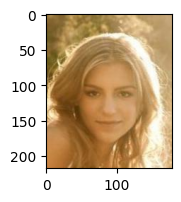

1
../data/raw_data/img_align_celeba/088571.jpg


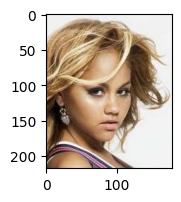

2
../data/raw_data/img_align_celeba/025132.jpg


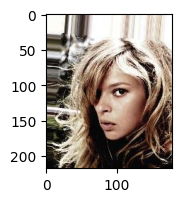

3
../data/raw_data/img_align_celeba/053380.jpg


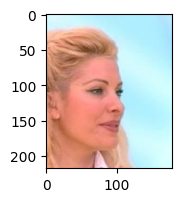

4
../data/raw_data/img_align_celeba/147812.jpg


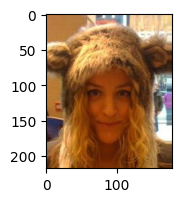

In [234]:
import matplotlib.pyplot as plt
plt.close("all")
path = "../data/raw_data/img_align_celeba/"

for i in range(5):
    print(i)
    img_filename = df.iloc[index_highsimilarity[i]].image_id
    filename = path + img_filename
    print(filename)
#    open_image(path,img_filename)
    img = Image.open(filename)
    plt.figure(figsize=(2,2))
    plt.imshow(img)
    plt.show()